# Exercise 2
*CS-E5885 Modeling Biological Networks* <br>
*19th Jan, 2022* <br>

<hr>

In [1]:
# Import packages
import sys
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

## 0. Generating random numbers (0 p)


**a)** This is how you can generate random real numbers from a normal distribution and plot their histogram.

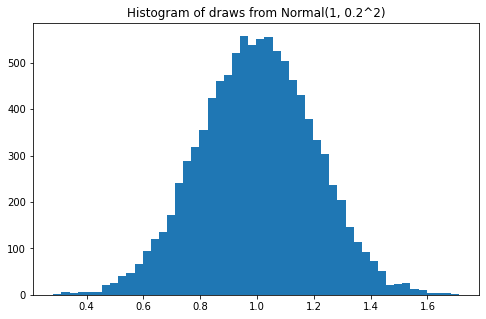

In [4]:
N = 10000 # number of draws
draws_a = np.random.normal(loc = 1, scale = 0.2, size = N) # loc = mean, scale = stdev

plt.figure(figsize = (8,5))
plt.hist(draws_a, bins = 50)
plt.title('Histogram of draws from Normal(1, 0.2^2)')
plt.show()

**b)** This is how you can generate random non-negative integers from a Poisson distribution.

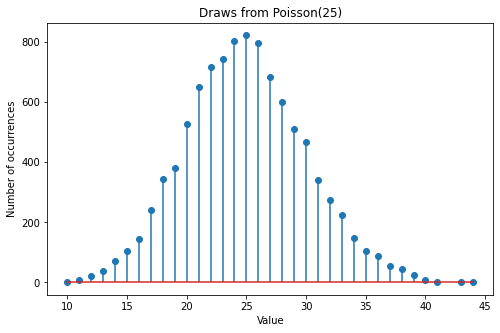

In [5]:
draws_b = np.random.poisson(lam=25, size=N) # lam = rate
values, counts = np.unique(draws_b, return_counts=True) # count occurrence of each integer

plt.figure(figsize = (8,5))
plt.stem(values, counts)
plt.title('Draws from Poisson(25)')
plt.xlabel('Value')
plt.ylabel('Number of occurrences')
plt.show()

**c)** This is how you can randomly pick items from a set of choices \{"apple", "pear", "banana"\} with replacement, so that

\begin{align*}
\text{Pr("apple")} &= 0.5 \\
\text{Pr("pear"}) &= 0.2 \\
\text{Pr("banana")} &= 0.3 \\
\end{align*}

In [6]:
items = ["apple", "pear", "banana"]
probabilities = np.array([0.5, 0.2, 0.3])
draws_c = np.random.choice(items, size = 20, p = probabilities, replace = True)
print(draws_c)

['apple' 'banana' 'apple' 'apple' 'banana' 'apple' 'banana' 'apple'
 'apple' 'banana' 'apple' 'apple' 'pear' 'apple' 'apple' 'apple' 'apple'
 'banana' 'pear' 'apple']


## 1. Poisson processes (2 p)
Suppose that a cell produces mRNA transcripts for gene A according to a homogeneous Poisson process
with a rate of 3 per second and for gene B according to a homogeneous Poisson process with a rate of
2 per second, and these processes are independent.

**a)** Let $X$ be the number of transcripts of A after 4 seconds. What is the distribution of the random variable $X$? 

**b)** Let $Y$ be the waiting time until the first transcript of A appears. What is the distiribution of the random variable $Y$?

**c)** Let $Z$ be the waiting time until the first transcript of either A or B appears. What is the distiribution of the random variable $Z$?

**d)** For each random variable $X$, $Y$, and $Z$: draw $10^4$ realizations from its distribution. If the random variable is continuous, plot a histogram of the draws with 50 bins like in **0 a)**. If it is discrete, plot the number of times each value was drawn, like in **0 b)**.

**Hint:** Answers to the "What is the distribution of..." questions are generally known probability distributions, so in your answer it is enough to write the name of the distribution and its parameter values. So no need to write the density function or anything.

# Poisson Processes
a) X ~ Po(3t), t=4 

b) Y ~ Exp(3) 

c) Z ~ Exp(3+2), because waiting time $T_1$ until the first transcript of A appears has an Exp distribution, and waiting time $T_2$ until the first transcript of B appears has an Exp distribution, so $min\{T_1, T_2\}$ ~ Exp(rate sum)

d) For each random variable  𝑋 ,  𝑌 , and  𝑍: draw  $10^4$  realizations from its distribution

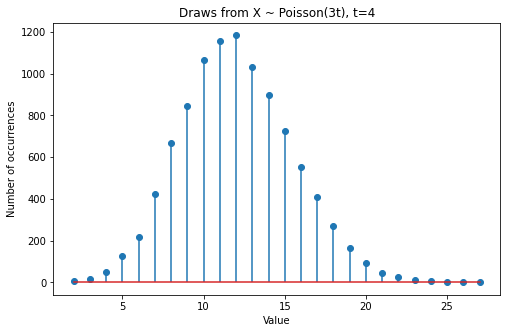

In [32]:
N = 10000
draws_X = np.random.poisson(lam=12, size=N) # lam = rate
values, counts = np.unique(draws_X, return_counts=True) # count occurrence of each integer

# the number of trabscripts is discrete, so plot the number of occurrence each value was drawn
plt.figure(figsize = (8,5))
plt.stem(values, counts)
plt.title('Draws from X ~ Poisson(3t), t=4')
plt.xlabel('Value')
plt.ylabel('Number of occurrences')
plt.show()

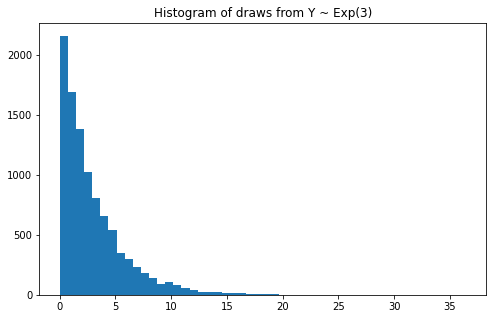

In [33]:
N = 10000
draw_Y = np.random.exponential(scale=3, size=N)

# the destribution is conttinuous, so plot a histogram of the draws with 50 bins
plt.figure(figsize = (8,5))
plt.hist(draw_Y, bins = 50)
plt.title('Histogram of draws from Y ~ Exp(3)')
plt.show()

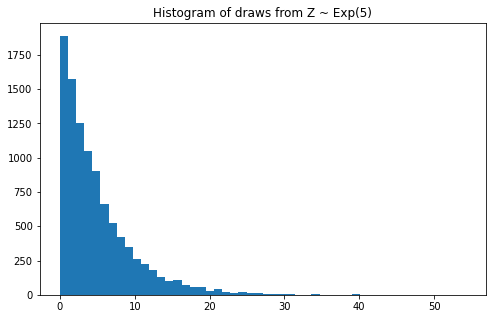

In [34]:
N = 10000
draw_Z = np.random.exponential(scale=5, size=N)

# the destribution is conttinuous, so plot a histogram of the draws with 50 bins
plt.figure(figsize = (8,5))
plt.hist(draw_Z, bins = 50)
plt.title('Histogram of draws from Z ~ Exp(5)')
plt.show()

## 2. Stochastic simulation using the Gillespie algorithm (4 p)

Read about the Gillespie algorithm in the Lecture 3 slides or Wilkinson book. Consider again the Lotka-Volterra system

$$
\begin{align*}
A &\longrightarrow 2 A &&\text{Species A reproduction}\\
A + B &\longrightarrow 2 B &&\text{Species B feeds on species A} \\
B &\longrightarrow \emptyset &&\text{Species B dies}
\end{align*}
$$

Your task is to simulate realizations of the Lotka-Volterra system on the time interval $[0, 50]$ using the Gillespie algorithm. Use the stochastic rate constants $c$ given in the below table, and an initial state of 80 molecules of A and 150 molecules of B.

| Reaction            | Stochastic rate constant |
|---------------------|--------------------------|
| $A$ $\rightarrow$ $2A$  | 1.0                      |
| $A + B$ $\rightarrow$ $2B$  | 0.015                    |
| $B$ $\rightarrow$ $\emptyset$   | 0.6                      |

**a)** Write the hazard function for each reaction (use notation $\textbf{x} = [x_1, x_2]$, where $x_1$ corresponds to $A$ and $x_2$ corresponds to $B$).

**b)** Implement the Gillespie algorithm using the code template below. Remember that in Python arrays start from zero so for example the first row of a 2-dimensional array called `arr` is `arr[0,:]`.


**a) Hazard functions**

The A reproduction reaction is a first-order reaction, so the hazard function will be: $$ h(c_1, x_1) = c_1 x_1 = 1.0 \cdot 80 =80 $$ where $c_1$ is a rate constant for the first reaction, and x_1 is a number of A molecules.
The second reaction is a second-order reaction with different type of molecules, so the hazard function will be: $$ h(c_2, x_1, x_2) = c_i x_1 x_2 = 0.015 \cdot 80 \cdot 150 = 180 $$
And finally, third reaction is again a first-order reaction: $$ h(c_3, x_2) = c_3 x_2 = 0.6 \cdot 150 = 90 $$ 

In [2]:
def hazard_first_order(x, c):
    return x*c

In [3]:
def hazard_second_order(xi, xj, c):
    return xi*xj*c

Reached max time.


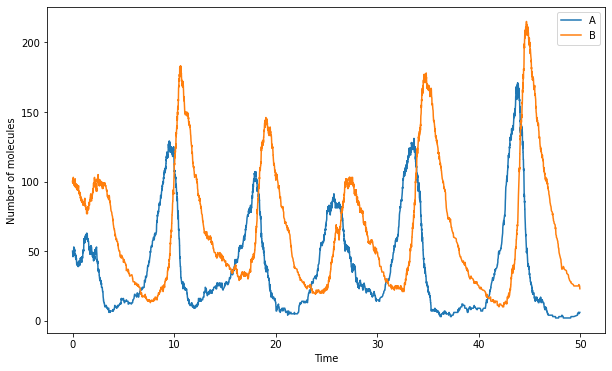

In [30]:
import random

max_iter = int(1e5)          # maximum number of reactions
T = np.zeros(max_iter)       # store reaction event times in this array
X = np.zeros((max_iter, 2))  # store the state after each reaction as rows of this array
    
# Initialize the system with initial numbers of molecules
X[0,:] = [50, 100]
c = [1.0, 0.015, 0.6]
# Initialize the system with initial time
T[0] = 0
max_time = 50
num_of_reactions = 3

# Main loop
S = np.array([[1, -1, 0], [0, 1, -1]])
h = [0]*num_of_reactions
for idx in range(0, max_iter-1):
    #
    # - Calculate the hazard for each reaction and the combined reaction hazard
    combined_hazard = 0
    
    h[0] = hazard_first_order(X[idx,0],c[0])
    h[1] = hazard_second_order(X[idx,1],X[idx,0],c[1])
    h[2] = hazard_first_order(X[idx,1],c[2])
    
    # combined hazard
    combined_hazard = sum(h)
    
    # calculate probabilities proportional to a hazard function in order to draw next reaction index
    probabilities = [h[i]/combined_hazard for i in range(num_of_reactions)]
    
    # - Determine which reaction happens next: draw the index of the next reaction (i.e, 0, 1 or 2)
    #  (hint: np.random.choice like in 0 c)
    next_reaction_idx = np.random.choice(range(num_of_reactions), p = probabilities, replace = True)
    #
    # - Draw the next reaction time and store it in T[idx+1]
    T[idx+1] = T[idx] + random.expovariate(combined_hazard)
    
    # - Calculate the updated state (number of molecules for both A and B) based on which reaction occurred
    #   and store it in X[idx+1, :]. Hint: you will need to know the stoichiometry matrix S of the system here.
    X[idx+1, :] = X[idx, :] + S[:, next_reaction_idx]

    # Stop if extinction of both species happened
    if sum(X[idx+1, :]) == 0:
        print("Extinction at t = {}".format(T[idx+1]))
        X = X[0:(idx+1), :]
        T = T[0:(idx+1)]
        break
        
    # Stop if max time reached
    current_time = T[idx+1]
    if current_time > max_time:
        print("Reached max time.")
        X = X[0:(idx+1), :]
        T = T[0:(idx+1)]
        break
        
plot_result(T, X)

**c)**  Use the `plot_result` function provided below to visualize simulation results. Run the simulation many times in order to get an understanding of the possible dynamics. Include a plot of one realization in your answer.

In [5]:
def plot_result(T, X):
    """Visualize a Lotka-Volterra simulation result. 
    
    :param T: 1-dimensional numpy array of reaction times.
    :param X: 2-dimensional numpy array containing the system states after each reaction.
    :return: Nothing.
    """
    plt.figure(figsize = (10,6))
    plt.plot(T, X);
    plt.xlabel('Time');
    plt.ylabel('Number of molecules')
    plt.legend(('A', 'B'));
    plt.show()